<a href="https://colab.research.google.com/github/Chandu0444/Machine_learning/blob/main/Revenue_pred_MC(20_11_2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Revenue Prediction Project**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/revenue_prediction.csv')

In [ ]:
data

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [ ]:
data.isnull().sum()

,0
Id,0
Name,0
Franchise,0
Category,0
City,0
No_Of_Item,0
Order_Placed,0
Revenue,0


In [ ]:
data.duplicated().sum()

np.int64(0)

#drop unecessary columns

In [ ]:
data=data.drop(columns=['Id' ,'Name'],axis=1)

In [ ]:
data

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,Yes,Mexican,Bengaluru,55,5.5,5953753
1,No,Varied Menu,Gurugram,72,6.8,7223131
2,Yes,Chicken,Pune,25,1.9,2555379
3,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...
95,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,Yes,Sports Bar,Pune,25,2.1,2344689


In [ ]:
data.groupby(['Category'])['Revenue'].mean().sort_values(ascending=False)

,Revenue
Category,
Asian,7.513524e+06
Healthy,5.966193e+06
Bakery Cafe,5.749800e+06
BBQ,5.542483e+06
Varied Menu,5.509978e+06
Burger,5.506968e+06
Seafood,4.491006e+06
Asian/Noodle,4.428070e+06
Pizza,4.274444e+06


In [ ]:
# top 5 restaurants by revenue
data.nlargest(5,['Revenue'])

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
16,Yes,Burger,Bengaluru,123,10.8,19696939
75,No,Bakery Cafe,Bengaluru,126,13.0,16549064
49,No,Varied Menu,Gurugram,117,8.5,8630682
24,Yes,BBQ,Mumbai,110,8.8,7904084
47,No,Family Casual,Bengaluru,85,7.7,7865428


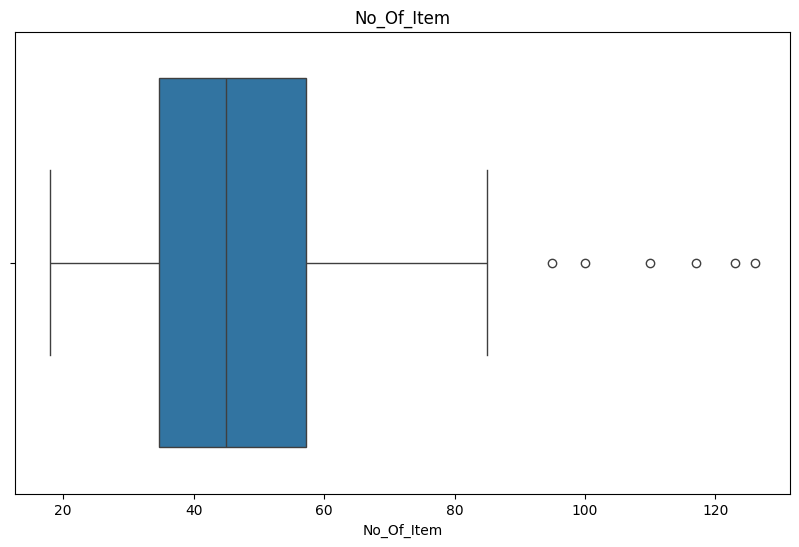

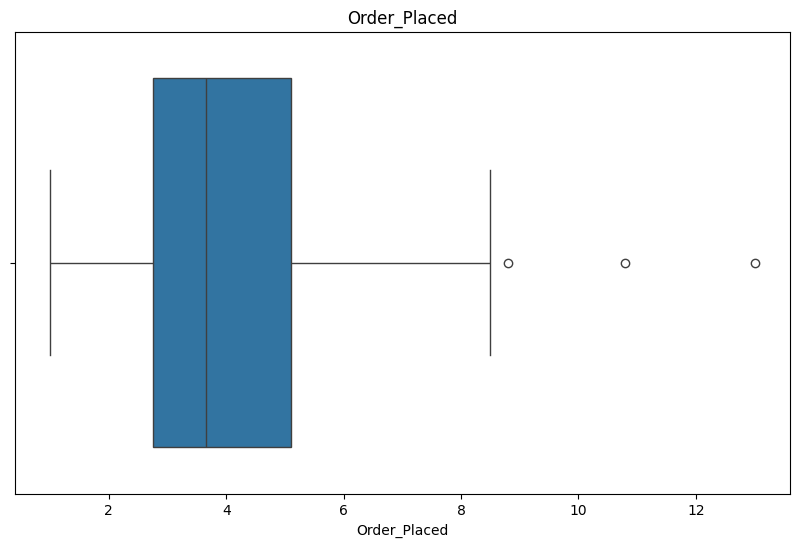

In [ ]:
col_list=list(data.columns)
for i in col_list:
   if data[i].dtypes != 'object' and i !=  'Revenue':
     plt.figure(figsize=(10,6))
     sns.boxplot(x=data[i])
     plt.title(i)
     plt.show()


In [ ]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
  if data[col].dtypes=='object':
    data[col]=le.fit_transform(data[col])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Franchise     100 non-null    int64  
 1   Category      100 non-null    int64  
 2   City          100 non-null    int64  
 3   No_Of_Item    100 non-null    int64  
 4   Order_Placed  100 non-null    float64
 5   Revenue       100 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 4.8 KB


In [ ]:
#splitting the data
x=data.drop(columns=['Revenue'],axis=1)
y=data['Revenue']

In [ ]:
x

,Franchise,Category,City,No_Of_Item,Order_Placed
0,1,12,0,55,5.5
1,0,19,1,72,6.8
2,1,5,4,25,1.9
3,1,11,2,18,2.5
4,1,13,3,48,4.2
...,...,...,...,...,...
95,0,11,0,19,1.1
96,1,19,0,75,6.3
97,1,19,1,77,6.2
98,1,17,4,25,2.1


In [ ]:
y

,Revenue
0,5953753
1,7223131
2,2555379
3,2175511
4,4816715
...,...
95,1270499
96,6412623
97,6694797
98,2344689


In [ ]:
# standardising the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=45)

Model_building - LR,DT,RM,SVR

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
y_pred_lr=lr.predict(x_test)
mae_lr=mean_absolute_error(y_test,y_pred_lr)
mse_lr=mean_squared_error(y_test,y_pred_lr)
r2_lr=r2_score(y_test,y_pred_lr)
print(f"lin_reg: \n mae:{mae_lr:.2f} \n mse:{mse_lr:.2f} \n r2_score:{r2_lr:.2f}")

lin_reg: 
 mae:423412.25 
 mse:362503352338.61 
 r2_score:0.82


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dt=dt.predict(x_test)
mae_dt=mean_absolute_error(y_test,y_pred_dt)
mse_dt=mean_squared_error(y_test,y_pred_dt)
r2_dt=r2_score(y_test,y_pred_dt)
print(f"decision tree: \n mae:{mae_dt:.2f} \n mse:{mse_dt:.2f} \n r2_score:{r2_dt:.2f}")

decision tree: 
 mae:689347.05 
 mse:1136001018602.25 
 r2_score:0.44


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf=rf.predict(x_test)
mae_rf=mean_absolute_error(y_test,y_pred_rf)
mse_rf=mean_squared_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)
print(f"decision tree: \n mae:{mae_rf:.2f} \n mse:{mse_rf:.2f} \n r2_score:{r2_rf:.2f}")

decision tree: 
 mae:448371.87 
 mse:403515511748.08 
 r2_score:0.80


In [ ]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)

SVR()

In [ ]:
y_pred_svr=svr.predict(x_test)
mae_svr=mean_absolute_error(y_test,y_pred_svr)
mse_svr=mean_squared_error(y_test,y_pred_svr)
r2_svr=r2_score(y_test,y_pred_svr)
print(f"decision tree: \n mae:{mae_svr:.2f} \n mse:{mse_svr:.2f} \n r2_score:{r2_svr:.2f}")

decision tree: 
 mae:1256103.30 
 mse:2389504680348.80 
 r2_score:-0.19


#Over best model is linear regression